In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [25]:
# set some globals, which are used across the remaining functions
IMAGE_SHAPE = (28,28,1)
NUM_CLASSES = 10
# training parameters
NUM_EPOCHS = 20
BATCH_SIZE = 128

In [27]:

train_df = pd.read_csv("../kaggleData/train.csv")
test_df = pd.read_csv("../kaggleData/test.csv")

y_train = train_df['label']
X_train = train_df.drop('label', axis=1)
X_test = test_df

In [28]:
X_train = X_train.to_numpy().reshape(42000, 28, 28)
X_test = X_test.to_numpy().reshape(28000, 28, 28)

In [29]:
y_train = y_train.to_numpy()

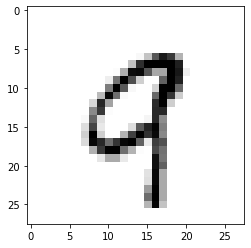

In [30]:
image_index = 41999 # You may select anything up to 60,000
plt.imshow(X_train[image_index], cmap='binary') # Show the image

In [31]:
X_train = (X_train.astype('float32') / 255.0)
X_test = (X_test.astype('float32') / 255.0)

In [32]:
model = Sequential()

model.add(Flatten(input_shape=[28,28])) # Change from 2-D to 1-D (28*28 neurons in input layer)

# Create Pyramid-like sequence for neural net
model.add(Dense(300, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation='softmax')) # output activation should be softmax for classication > 2 output classes

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=NUM_EPOCHS)

Epoch 1/20
1313/1313 [==============================] - 1s 943us/step - loss: 0.6925 - accuracy: 0.8103
Epoch 2/20
1313/1313 [==============================] - 1s 997us/step - loss: 0.2449 - accuracy: 0.9275
Epoch 3/20
1313/1313 [==============================] - 1s 942us/step - loss: 0.1809 - accuracy: 0.9464
Epoch 4/20
1313/1313 [==============================] - 1s 940us/step - loss: 0.1443 - accuracy: 0.9571
Epoch 5/20
1313/1313 [==============================] - 1s 976us/step - loss: 0.1203 - accuracy: 0.9645
Epoch 6/20
1313/1313 [==============================] - 1s 952us/step - loss: 0.1020 - accuracy: 0.9699
Epoch 7/20
1313/1313 [==============================] - 1s 974us/step - loss: 0.0858 - accuracy: 0.9747
Epoch 8/20
1313/1313 [==============================] - 1s 958us/step - loss: 0.0750 - accuracy: 0.9783
Epoch 9/20
1313/1313 [==============================] - 1s 991us/step - loss: 0.0646 - accuracy: 0.9812
Epoch 10/20
1313/1313 [==============================] - 1s 960u

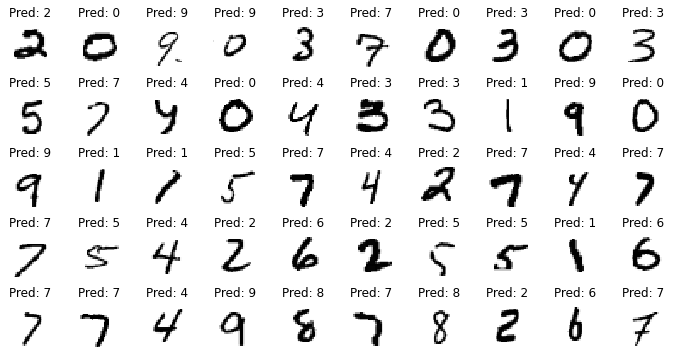

In [36]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        pred = model.predict_classes(X_test[index:index+1])[0]
        plt.title("Pred: {}".format(pred))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
preds = model.predict_classes(X_test)
output_dict = {"ImageId": np.arange(1, len(preds) + 1, 1), "label": preds}
preds_df = pd.DataFrame(output_dict)